# TRANSFORM DOMAIN

Details in images are generally found in
* high frequencies
* very rapid alterations of dark and brigh areas

One of the possibilities to determine how much detail we want in a picture is to change the domain of analysis.

To move from the spatial domain (pixels) to the frequency domain we use **transforms**.

A transform is a class of unary matrices that are used to represent signals

* A 1-D signal can be expressed as the combination of a number of orthonormal basis functions

* A 2-D signal can be expressed as the combination of a number of basis matrices called basis images

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

if not os.path.isfile('lena.bmp'):
  !wget -O lena.bmp "https://drive.google.com/uc?export=download&id=15o8_ABAaQA_7s5eGhqtEymDSPa_rPt6P"

im = cv2.imread('../Images/lena.bmp', 0)
im1 = np.float32(im)/255.0

## Fourier Transform

The Fourier transform decomposes a function of time (a signal) into its constituent frequencies.

Most of the Fourier transform is concentrated in the center (low frequencies).

Deleting the central frequencies saves a lot of data and does not affect too much the image.

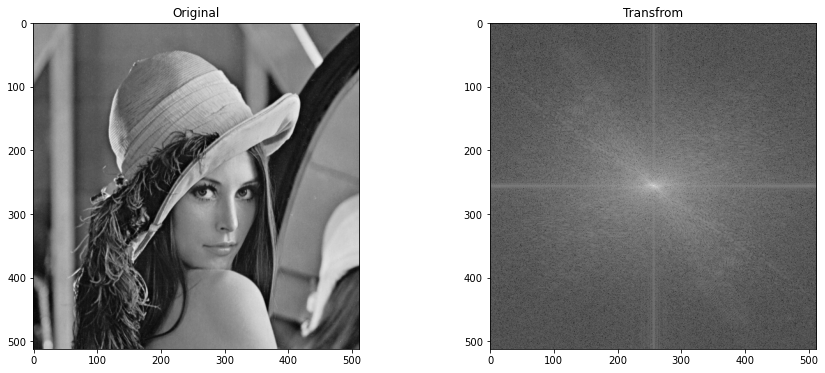

In [2]:
transform = np.fft.fftshift(np.fft.fft2(im))

# Show orginal and edited images side by side
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)), cmap='gray')
plt.show()

## Discrete Cosine Transform

The Discrete Cosine Transform (DCT) has many advantages:

* it is real and orthgonal: the inverse matrix corresponds to the transposed matrix

* it is fast

* it allows an optimal energy allocation if data is correlated



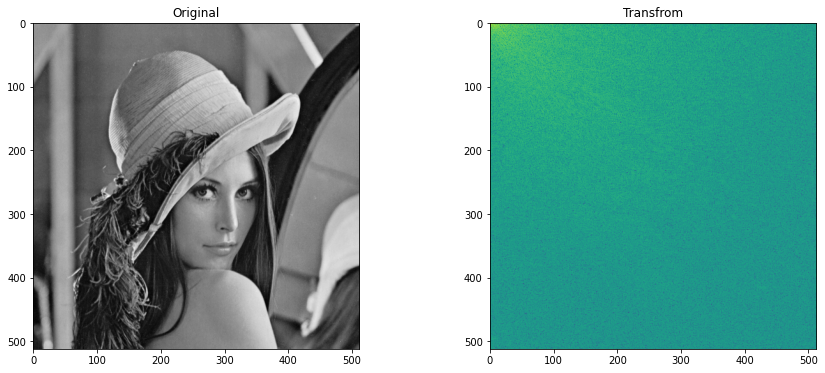

In [ ]:
from scipy.fft import dct

transform =  dct(dct(im,axis=0, norm='ortho'),axis=1, norm='ortho')

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(im, cmap='gray')
plt.subplot(122)
plt.title('Transfrom')
plt.imshow(np.log(abs(transform)))
plt.show()

Exercises:
* remove the DC component
* remove low and high frequencies

/var/folders/_p/p0j6h4hx26j4kp8_fcgq1mp80000gn/T/ipykernel_28461/1612732515.py:17: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(transform)))


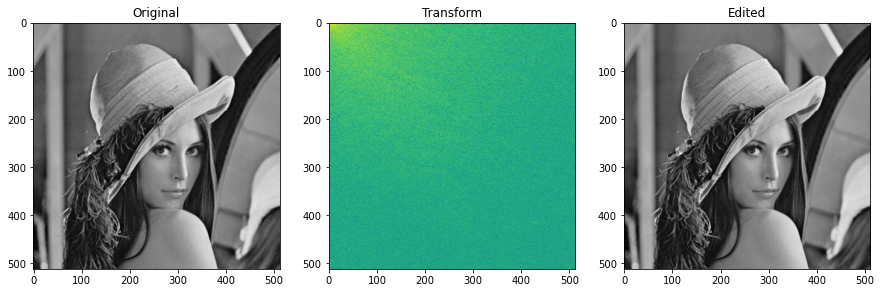

In [35]:
from scipy.fft import dct, idct

transform =  dct(dct(im,axis=0, norm='ortho'),axis=1, norm='ortho')

transform[0,0] = 0

edited = idct(idct(transform,axis=0, norm='ortho'),axis=1, norm='ortho')

plt.figure(figsize=(15, 6))

plt.subplot(131)
plt.title('Original')
plt.imshow(im, cmap='gray')

plt.subplot(132)
plt.title('Transform')
plt.imshow(np.log(abs(transform)))

plt.subplot(133)
plt.title('Edited')
plt.imshow(edited, cmap='gray')
plt.show()

## Wavelet transform

The Wavelet transform can either be **continuous** or **discrete**. For images we typically use the Discrete Wavelt Transform (DWT), which uses differnt filters to analyse the signal at different levels:

* high-pass filters to analyse high frequencies
* low-pass filters to analyse low frequencies

The main properties of DWT are
* it is real, multiscale and multiresolution
* depending on the chosen basis function it is possible to obtain a high energy reduction
* it is well suited to represent the Human Visual System (HVS) thanks to its multiresolution properties

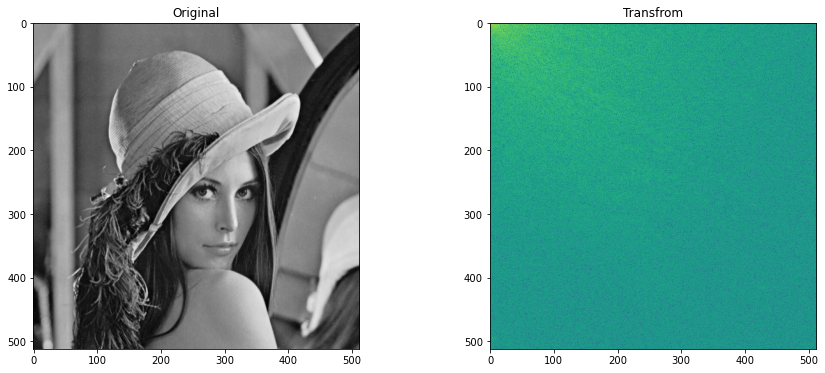

In [4]:
import pywt
# from google.colab.patches import cv2_imshow
coeffs2 = pywt.dwt2(im, 'haar')
LL, (LH, HL, HH) = coeffs2

# Show components
blank_image = np.zeros((512,512), np.float32)
blank_image[:256, :256] = LL
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

# cv2_imshow(blank_image)
cv2.imshow("Image", blank_image)

Exercises:
* remove each subband and see what happens
* visualize the second level decomposition

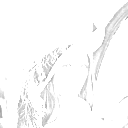

In [31]:
import pywt
# from google.colab.patches import cv2_imshow
coeffs2 = pywt.dwt2(im, 'haar')
LL, (LH, HL, HH) = coeffs2

# Show components
blank_image = np.zeros((512,512), np.float32)
blank_image[:256, :256] = LL
blank_image[:256, 256:] = LH
blank_image[256:, :256] = HL
blank_image[256:, 256:] = HH

coeffs3 = pywt.dwt2(LL, 'haar')
LL3, (LH3, HL3, HH3) = coeffs3

blank_image[:128, :128] = LL3
blank_image[:128, 128:256] = LH3
blank_image[128:256, :128] = HL3
blank_image[128:256, 128:256] = HH3

# cv2_imshow(blank_image3)
cv2.imshow("Image", blank_image)